In [1]:
# Load Imports and Libraries
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.impute import SimpleImputer

# Data Visualizations
import matplotlib.pyplot as plt

In [2]:
# Load in train and test data
df_train = pd.read_csv("../../data/cs-training.csv")

In [3]:
# Get Data Types and null values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

**Observations**
1. about 30k null vals for Monthly Income
1. about 6k null vals for # of deps
1. All numeric values

**Solutions**
1. impute 'MonthlyIncome' with median value
1. impute 'NumberOfDependents' with median value
1. drop 'Unnamed: 0'

In [4]:
# Drop duplicate columns
df_train.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Preview Data
df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


### Missing Values

In [6]:
# Check null values
df_train.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
# Function for imputing a specified strategy
def impute(df, column, strategy):
    imp = SimpleImputer(missing_values=np.nan, strategy=strategy)
    imp.fit(df[column].values.reshape(-1,1))
    return imp.transform(df[column].values.reshape(-1,1))

In [8]:
# Impute Monthly Income
df_train['MonthlyIncome'] = impute(df=df_train, column='MonthlyIncome', strategy='mean')

In [9]:
# Impute Number of Dependents
df_train['NumberOfDependents'] = impute(df=df_train, column='NumberOfDependents', strategy='mean')

In [10]:
# Check descriptive statistics
df_train.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.100404
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


### Handling Outliers

**Observations**
Potential outlier values;
1. potential entry error, 'RevolvingUtilizationOfUnsecuredLines' is a percentage

**Solution**
1. All values above 1.25 are counted as top values and replaced as such

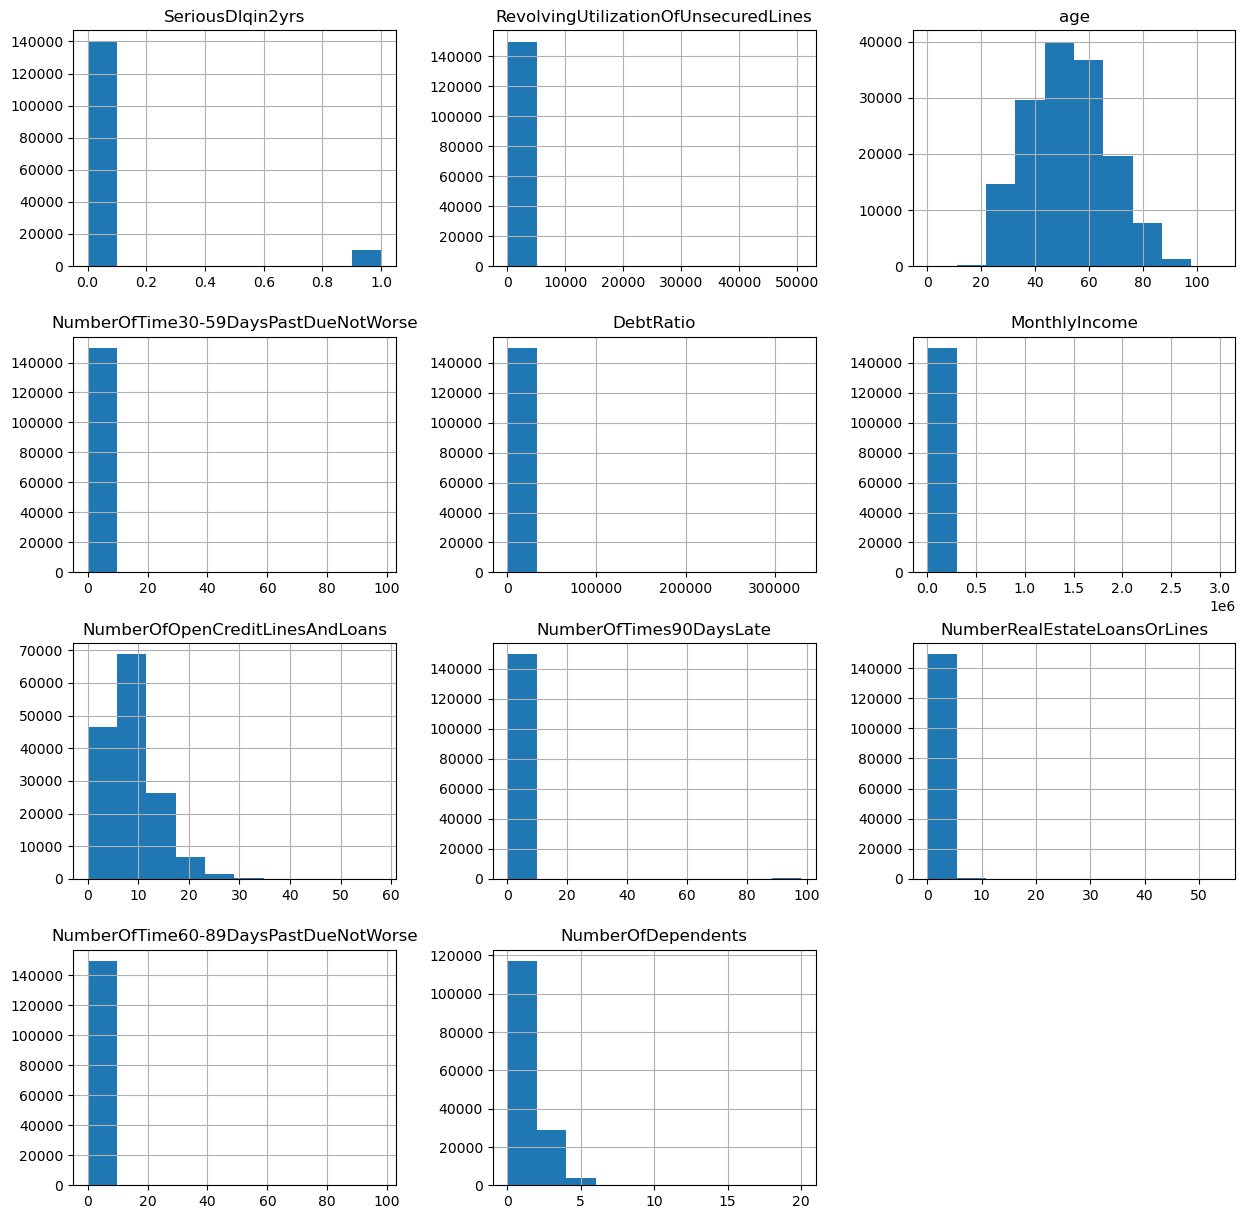

In [11]:

df_train.hist(figsize=(15,15));

#### `RevolvingUtilizationOfUnsecuredLines`

Total Outliers Present:  926


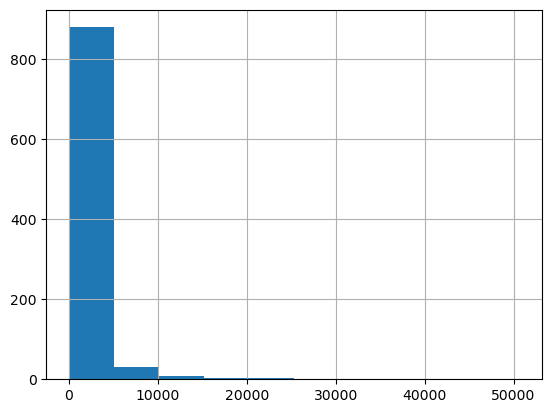

In [12]:
# Plot Outliers
outlier_utilizations = df_train.loc[df_train['RevolvingUtilizationOfUnsecuredLines']>1.25, 'RevolvingUtilizationOfUnsecuredLines']
print("Total Outliers Present: ", outlier_utilizations.count())
outlier_utilizations.hist();

In [13]:
# Replace outliers with top value of 1.25
df_train['RevolvingUtilizationOfUnsecuredLines'].where(df_train['RevolvingUtilizationOfUnsecuredLines'] < 1.25, 1.25, inplace=True)

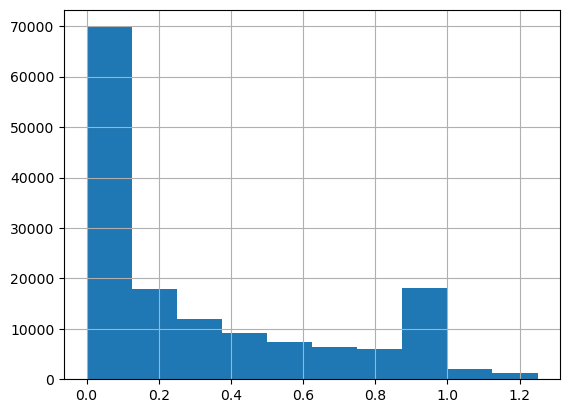

In [14]:
# Display of new Revolving Utilization distribution
df_train['RevolvingUtilizationOfUnsecuredLines'].hist();

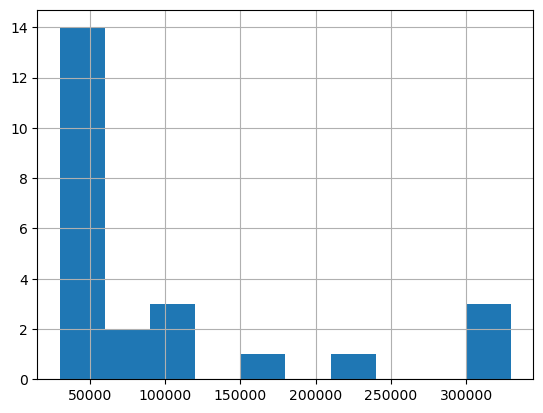

In [15]:
df_train.loc[df_train['DebtRatio']>30000, 'DebtRatio'].hist();

In [16]:
# Export training data
df_train.to_csv('../../data/train_no_nulls.csv')